# L05: Least squares and regression

**Sources and additional reading:**

- Lupton, chapters 10.3, 11

## Example: Fitting straight line to data

Let us assume that we have a set of data points $(x_1, ..., x_n)$, as well as a corresponding set of $(y_1, ..., y_n)$. Each $y_i$ is drawn from a Gaussian distribution centered on $y_{t, i}$ with standard deviation $\sigma_i$ (see figure below). In addition, we have a model that predicts $$y_i = f(x_i, \theta) = \theta_0+\theta_1x_i.$$ Our aim is to estimate the values of $\theta_0, \theta_1$.

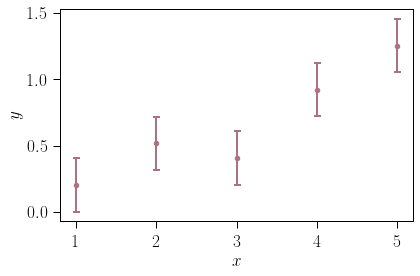

Given what we discussed last week, our method of choice is MLE, and we can write down the log-likelihood for this problem as $$\log P(y_1, ..., y_n|x_1, ..., x_n, \theta) = -\frac{n}{2}\log{2\pi}-\sum_i\log{\sigma_i}-\sum_i \frac{(y_i-f(x_i, \theta))^2}{2\sigma_i^2}.$$ As the variances are known, minimizing this likelihood is equivalent to maximizing $$\chi^2 := -\log P(y_1, ..., y_n|x_1, ..., x_n, \theta) = \sum_i \frac{(y_i-f(x_i, \theta))^2}{2\sigma_i^2},$$ where we have ignored constants that do not depend on the parameters $\theta$. 

If the errors in all observations $y_i$ are equal, i.e. $\sigma_i=\sigma$ for all $i$, this simplifies to $$\chi^2 = \sum_i (y_i-f(x_i, \theta))^2.$$ This is nothing else than the sum of the squared deviations between the data and the model. Starting with MLE, we have rediscovered the method of *ordinary least squares* to estimate model parameters to data.

Let us now see this method in action: Assuming a linear model for the $y_i$, we can estimate $\hat{\theta}_0$ and $\hat{\theta}_1$ through $$\frac{\partial \chi^2}{\partial \hat{\theta}_0} \overset{!}{=} 0,$$ $$\frac{\partial \chi^2}{\partial \hat{\theta}_1} \overset{!}{=} 0.$$ Inserting and expanding out then gives $$\hat{\theta}_1=\frac{\sum_i(x_i-\bar{x})(y_i-\bar{y})}{\sum_i(x-\bar{x})^2},$$ $$\hat{\theta}_0=\bar{y}-\hat{\theta}_1\bar{x}.$$

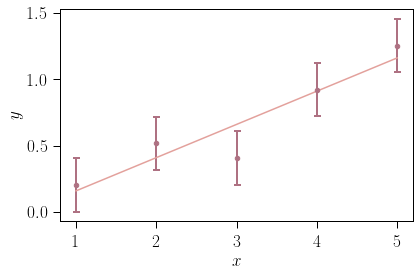

## Generalized least squares 

In order to better understand the advantages of LS methods, we now look at a more general case. Let us denote the measurement vectors as $\boldsymbol{x}$, $\boldsymbol{y}$. For $n$ measurements, these both have dimensions $n\times 1$. We assume a model that is linear in the parameters $\boldsymbol{\theta}$, i.e. $$\boldsymbol{y}=M\boldsymbol{\theta}+\boldsymbol{\epsilon}.$$ Here, $\boldsymbol{\theta}$ is an $k \times 1$ parameter vector and $\boldsymbol{\epsilon}$ is drawn from a Gaussian distribution with mean $0$ and covariance matrix $C$. It is important to note that the assumed model is linear in the parameters, but does not have to be linear in the measurements $\boldsymbol{x}$.

As an example, in our previous case we would have $$\boldsymbol{y}=\begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix},$$ $$\boldsymbol{\theta}=\begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix},$$ and $$M=\begin{bmatrix} 1 & x_1 \\ \vdots \\ 1 & x_n \end{bmatrix}.$$

Minimizing the $\chi^2$ then reduces to minimizing $$\chi^2=(\boldsymbol{y}-M\boldsymbol{\theta})^TC^{-1}(\boldsymbol{y}-M\boldsymbol{\theta}).$$ 

As in the MLE case, we can obtain this by setting the first derivative wrt $\boldsymbol{\theta}$ to zero, i.e. $$\frac{\partial \chi^2}{\partial \boldsymbol{\theta}}=\boldsymbol{y}^TC^{-1}\boldsymbol{y} - \boldsymbol{\theta}^TM^TC^{-1}\boldsymbol{y} -\boldsymbol{y}^TC^{-1}M\boldsymbol{\theta}+\boldsymbol{\theta}^TM^TC^{-1}M\boldsymbol{\theta}\overset{!}{=} 0.$$ The quantity $\boldsymbol{\theta}^TM^TC^{-1}\boldsymbol{y}$ is a scalar, and thus we get $$-M^TC^{-1}\boldsymbol{y}+M^TC^{-1}M\boldsymbol{\theta} = 0,$$ and thus $$\hat{\boldsymbol{\theta}}_{\mathrm{LLS}}=(M^TC^{-1}M)^{-1}M^TC^{-1}\boldsymbol{y}.$$

If the model is a good description of the data, then the LLS estimator is unbiased as $$\langle \hat{\boldsymbol{\theta}}\rangle=\langle(M^TC^{-1}M)^{-1}M^TC^{-1}(M\boldsymbol{\theta}+\boldsymbol{\epsilon})\rangle = \boldsymbol{\theta} + (M^TC^{-1}M)^{-1}M^TC^{-1}\langle \boldsymbol{\epsilon}\rangle = \boldsymbol{\theta}.$$ In addition, this equation shows that $\hat{\boldsymbol{\theta}}$ is a linear combination of  $\boldsymbol{\epsilon}$. Thus if $\boldsymbol{\epsilon}$ is a Gaussian random variable (as we are assuming here), then $\hat{\boldsymbol{\theta}}$ is a Gaussian random variable itself. Therefore, we see that the linear least squares estimator is Gaussian-distributed for Gaussian initial data. We can compute its covariance matrix (which completely characterizes its distribution alongside the mean) analytically as $$C(\hat{\boldsymbol{\theta}})=\langle (\hat{\boldsymbol{\theta}}-\boldsymbol{\theta})(\hat{\boldsymbol{\theta}}-\boldsymbol{\theta})^T \rangle=\langle (M^TC^{-1}M)^{-1}M^TC^{-1}\boldsymbol{\epsilon}\boldsymbol{\epsilon}^TC^{-1}M(M^TC^{-1}M)^{-1}\rangle = (M^TC^{-1}M)^{-1}M^TC^{-1}\langle\boldsymbol{\epsilon}\boldsymbol{\epsilon}^T\rangle C^{-1}M(M^TC^{-1}M)^{-1} = (M^TC^{-1}M)^{-1}.$$ We are free to use LLS also for non-Gaussian data (this is equivalent to minimizing a cost function of choice). However in this case, the ML and the LLS estimators will not be consistent and the LLS estimator will also not be Gaussian-distributed.

<font color='pink'>[AN: outliers?]</font>